In [36]:
import platform
import pandas as pd
import sklearn
import numpy as np
import graphviz
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
df = pd.read_csv('Churn.csv')
df.shape

(7043, 21)

In [38]:
df = df.dropna(how="all")  # remove samples with all missing values
df.shape

(7043, 21)

In [39]:
df = df[~df.duplicated()] # remove duplicates
df.shape

(7043, 21)

In [40]:
total_charges_filter = df.TotalCharges == " "
df = df[~total_charges_filter]
df.shape

(7032, 21)

In [41]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [42]:
df.describe(include='all')

customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7032   7032    7032.000000    7032       7032  7032.000000   
unique        7032      2            NaN       2          2          NaN   
top     2351-RRBUE   Male            NaN      No         No          NaN   
freq             1   3549            NaN    3639       4933          NaN   
mean           NaN    NaN       0.162400     NaN        NaN    32.421786   
std            NaN    NaN       0.368844     NaN        NaN    24.545260   
min            NaN    NaN       0.000000     NaN        NaN     1.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...    \
count          7032          7032            7032           7032  ...     
unique            2             3               3              3  ...     
top             Yes            No     Fiber optic             No  ...     
freq           6352          3385            3096           3497  ...     
mean            NaN           NaN             NaN            NaN  ...     
std             NaN           NaN             NaN            NaN  ...     
min             NaN           NaN             NaN            NaN  ...     
25%             NaN           NaN             NaN            NaN  ...     
50%             NaN           NaN             NaN            NaN  ...     
75%             NaN           NaN             NaN            NaN  ...     
max             NaN           NaN             NaN            NaN  ...     

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7032        7032        7032            7032   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3094        3472        2809            2781   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
count             7032             7032              7032    7032.000000   
unique               3                2                 4            NaN   
top     Month-to-month              Yes  Electronic check            NaN   
freq              3875             4168              2365            NaN   
mean               NaN              NaN               NaN      64.798208   
std                NaN              NaN               NaN      30.085974   
min                NaN              NaN               NaN      18.250000   
25%                NaN              NaN               NaN      35.587500   
50%                NaN              NaN               NaN      70.350000   
75%                NaN              NaN               NaN      89.862500   
max                NaN              NaN               NaN     118.750000   

        TotalCharges  Churn  
count    7032.000000   7032  
unique           NaN      2  
top              NaN     No  
freq             NaN   5163  
mean     2283.300441    NaN  
std      2266.771362    NaN  
min        18.800000    NaN  
25%       401.450000    NaN  
50%      1397.475000    NaN  
75%      3794.737500    NaN  
max      8684.800000    NaN  

[11 rows x 21 columns]

In [43]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [44]:
df[numerical_features].describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259EF9312B0>,
      dtype=object)

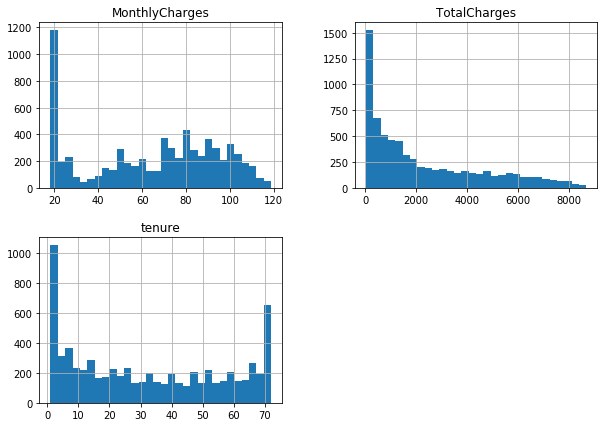

In [45]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000259F2490978>,
      dtype=object)

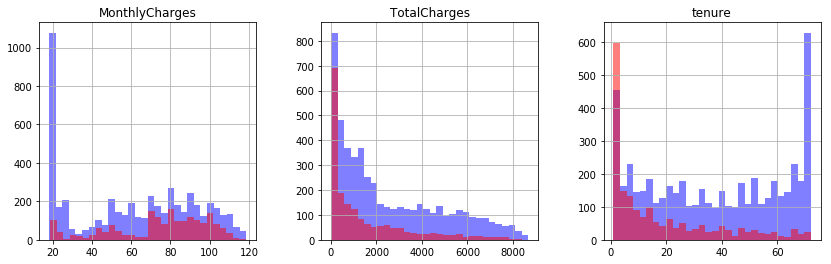

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

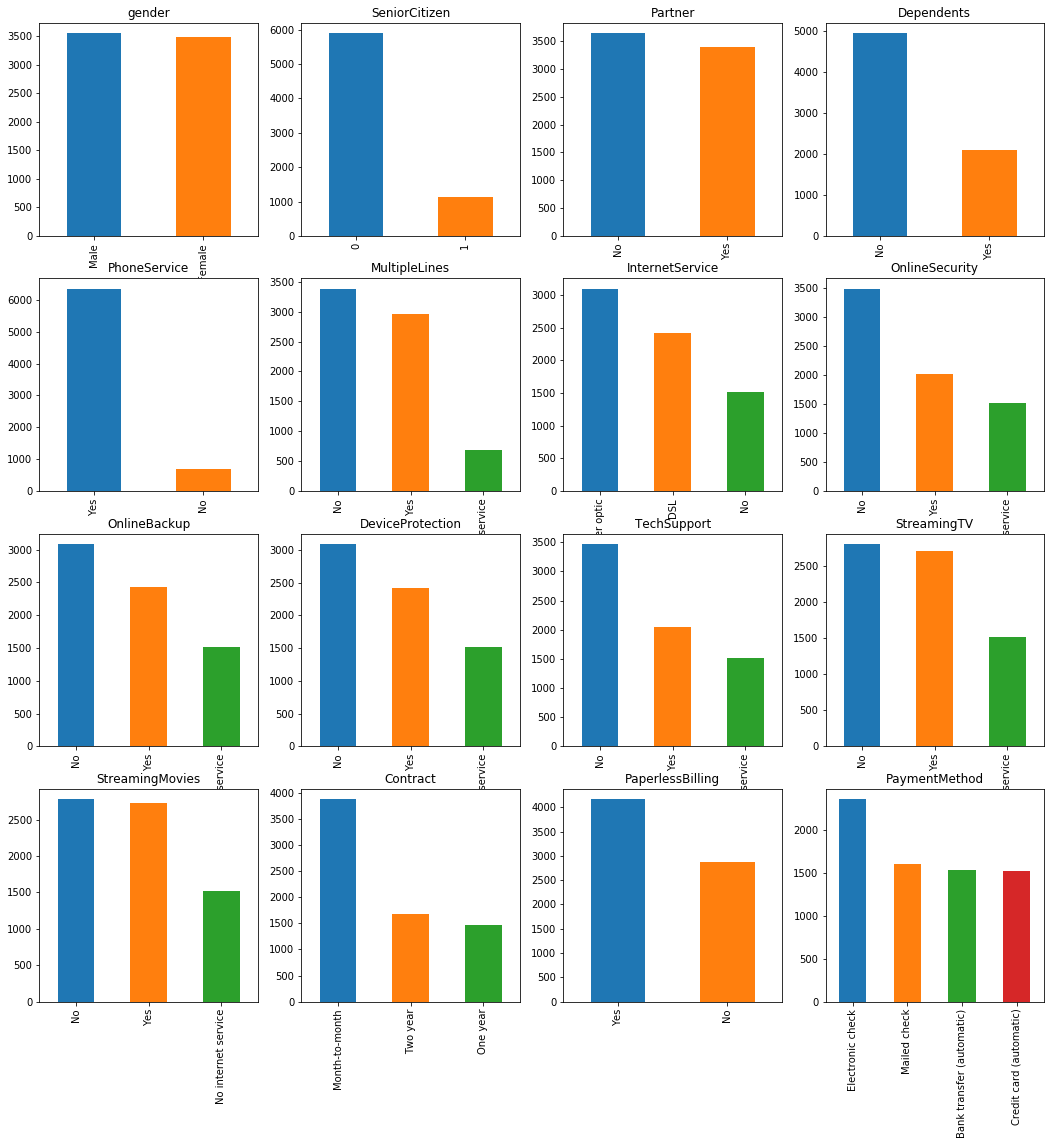

In [47]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 18))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot('bar', ax=ax[row, col]).set_title(categorical_feature)